# Spaceship Titanic

Author: HanChen Wang  
Date: Jan 3 2023  
Link to original data [link](https://www.kaggle.com/competitions/spaceship-titanic/data)  

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.  

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.  

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!  

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.  

Help save them and change history!


## Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions
**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.  
`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  
`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.  
`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  
`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.  
`Destination` - The planet the passenger will be debarking to.  
`Age` - The age of the passenger.  
`VIP` - Whether the passenger has paid for special VIP service during the voyage.  
`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
`Name` - The first and last names of the passenger.  
`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  


**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.  


**sample_submission.csv** - A submission file in the correct format.  
`PassengerId` - Id for each passenger in the test set.  
`Transported` - The target. For each passenger, predict either True or False.  

In [80]:
# Loading the data
import pandas as pd
import altair as alt
from altair_data_server import data_server

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

train_df = pd.read_csv("data/raw/train.csv")
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
# There are 8693 passenger records. The `train_df` is selected from two-thrids of the entire passenger list. 
# There are missing values for all features except `PassengerID` and the target `Transported`
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [67]:
# Let's look at the target first. This is a binary feature. We can visualize it with a frequency table.
# About half of the passengers in the train_df are transported away.

# We can now use the target with each feature to see if there are trends/relationships. 
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [60]:
# Let's look at the `PassengerId` column first. We can get how many groups are there, and min, avg, and max
# members per group.

# There are 6217 groups in the train_df, and up to 8 members per group (groupId 4498). Most groups has only 
# 1 member.

passIdsplit = pd.DataFrame(train_df["PassengerId"].str.split('_', expand=True).values,
             columns=['groupId', 'memberId'])
passIdsplit.describe()

,groupId,memberId
count,8693,8693
unique,6217,8
top,4498,01
freq,8,6217


In [81]:
# Let's look at the `HomePlanet` feature. This is a categorical feature. We can visualize it with a frequency table.
# More passengers seem to come from Earth than Europa or Mars. In the train_df, Europa has more transported
# passengers than non-transported, Earth has more non-transported, and Mars has slightly more transported. 
train_df[['HomePlanet','Transported']].value_counts(sort=False)

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
dtype: int64

/opt/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


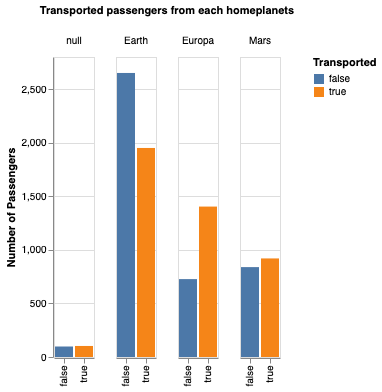

In [98]:
alt.Chart(train_df[['HomePlanet','Transported']]).mark_bar().encode(
    x=alt.X("Transported:N", title=""),
    y=alt.Y("count()", title="Number of Passengers"),
    color=alt.Color("Transported:N"),
    column=alt.Column("HomePlanet:N", title="Transported passengers from each homeplanets")
)

In [103]:
# Let's look at the `CryoSleep` feature. This is a binary feature. We can visualize it with a frequency table.
# More than half of passengers who chose cryosleep were transported. Less than half of passengers who 
# didn't elect into cryosleep were transported. 
train_df[['CryoSleep','Transported']].value_counts()

CryoSleep  Transported
False      False          3650
True       True           2483
False      True           1789
True       False           554
dtype: int64

/opt/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


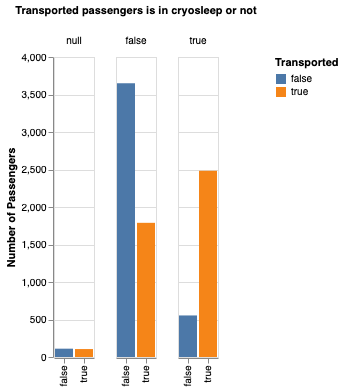

In [104]:
alt.Chart(train_df[['CryoSleep','Transported']]).mark_bar().encode(
    x=alt.X("Transported:N", title=""),
    y=alt.Y("count()", title="Number of Passengers"),
    color=alt.Color("Transported:N"),
    column=alt.Column("CryoSleep:N", title="Transported passengers is in cryosleep or not")
)

In [ ]:
# Let's look at the `CryoSleep` feature. This is a binary feature. We can visualize it with a frequency table.
# More passengers seem to not elect to be put into suspended animation for the duration of the voyage.
train_df['CryoSleep'].value_counts()